In [31]:
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image 

CATEGORIES = ["airplane","ant","apple","axe","banana","baseball","bee","bus","car","diamond",
              "grapes","grass","hand","pineapple","tornado"]

drawing = "car3.jpg"

def prepare(filepath):
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
    print(new_array.shape)
    plt.imshow(new_array, interpolation='nearest')
    plt.show()
#     imgplot = plt.imshow(new_array)
#     plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  

model = tf.keras.models.load_model("kerasmodel.h5")

In [35]:
def check255(array):
    for i in array:
            if(i != 255):
                return 1

data = np.array([
    [255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255],
    [255, 1, 1, 1, 255],
    [255, 1, 1, 1, 255],
    [255, 1, 255, 1, 255],
    [255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255],
])
def crop(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    print("img type:", img_array.dtype)
    print("img shape:", img_array.shape)
    #crop top
    top = 0
    for i in img_array: 
        if(check255(i)):
            break
        else:
            top += 1
            continue
            
    #crop right
    rotright = np.rot90(img_array)
    right = 0
    print(rotright)
    for i in rotright:
        if(check255(i)):
            break
        else:
            right += 1
            continue
            
    #crop bottom
    bot = 0
    rotbot = np.rot90(rotright)
    print(rotbot)
    for i in rotbot:
        if(check255(i)):
            break
        else:
            bot += 1
            continue
            
    #crop left
    left = 0
    rotleft = np.rot90(rotbot)
    for i in rotleft:
        if(check255(i)):
            break
        else:
            left += 1
            continue
            
    return top, right, bot, left
crop(drawing)

img type: uint8
img shape: (648, 1152)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(200, 536, 320, 320)

(28, 28)


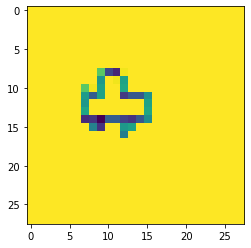

Time taken was 0.2393791675567627 seconds


In [29]:
t1 = time.time()
prediction = model.predict([prepare(drawing)])
t2 = time.time()
print( 'Time taken was {} seconds'.format( t2 - t1))
prediction = list(prediction[0])

In [5]:
print(CATEGORIES[prediction.index(max(prediction))])

grapes


In [6]:
print(prediction)

[0.040040635, 0.22960047, 0.027237039, 0.025603943, 0.014705143, 0.07857608, 0.122196004, 0.0148890605, 0.025844892, 0.019229919, 0.25133747, 0.041615, 0.046225253, 0.014392424, 0.048506618]


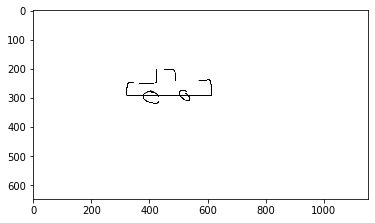

In [36]:
img=cv2.imread(drawing)
img
imgplot = plt.imshow(img)
plt.show()